In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [3]:
df = pd.read_csv("countvectorized_dataframes/count_vectorized_dataset.csv")

In [6]:
df.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mixed Opinions
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hate Speech Regulation
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hate Speech Regulation


In [7]:
df_clean = pd.read_csv("cleaned_dataframes/cleaned_merged_df.csv")

In [8]:
df_clean.head()

,Unnamed: 0,Label,Content
0,0,Free Speech,social media brands achieve relevant different...
1,1,Free Speech,downloads trump vpns everything know potential...
2,2,Mixed Opinions,water cooler brown thrasher wannagan creek cab...
3,3,Hate Speech Regulation,misinformation business meta musk endanger dem...
4,4,Hate Speech Regulation,elon musk elevating trump foreign policy delib...


In [9]:
df_clean = df_clean.drop(columns=['Unnamed: 0',"Label"])

In [10]:
df_clean

,Content
0,social media brands achieve relevant different...
1,downloads trump vpns everything know potential...
2,water cooler brown thrasher wannagan creek cab...
3,misinformation business meta musk endanger dem...
4,elon musk elevating trump foreign policy delib...
...,...
821,dave chappelle fights cancel culture comedians...
822,biden agency violated free speech working big ...
823,advocates push elon musk fight censorship peti...
824,alex berenson free speech changed times change...


In [13]:
vectorizer = CountVectorizer(
    stop_words='english',
    min_df=5,
    token_pattern=r'(?u)\b[a-zA-Z]{3,}\b'
)
X = vectorizer.fit_transform(df_clean['Content'])

<826x9181 sparse matrix of type '<class 'numpy.int64'>'
	with 257611 stored elements in Compressed Sparse Row format>

In [16]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [17]:
X_df.head()

,abandon,abandoned,abandoning,abbott,abc,abhorrent,abide,abilities,ability,able,...,zedong,zeitgeist,zero,zip,zombie,zone,zones,zoom,zuck,zuckerberg
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2


In [19]:
lda = LatentDirichletAllocation(
    n_components=4,         # number of topics
    max_iter=10,
    learning_method='online',
    random_state=42
)
lda.fit(X)


LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=42)

In [20]:
feature_names = vectorizer.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, feature_names)



Topic #1:
trump, speech, media, government, content, social, companies, free, platforms, censorship

Topic #2:
state, states, china, read, coronavirus, united, world, trump, country, health

Topic #3:
think, speech, free, right, want, say, make, way, things, social

Topic #4:
openai, chatgpt, users, content, data, google, tiktok, meta, media, model


In [22]:
lda2 = LatentDirichletAllocation(
    n_components=6,         # number of topics
    max_iter=10,
    learning_method='online',
    random_state=42
)
lda2.fit(X)

LatentDirichletAllocation(learning_method='online', n_components=6,
                          random_state=42)

In [23]:
feature_names = vectorizer.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda2, feature_names)


Topic #1:
government, speech, trump, media, companies, social, free, law, content, censorship

Topic #2:
data, state, social, tweets, media, figure, republican, political, income, tax

Topic #3:
speech, think, free, right, want, say, make, social, way, things

Topic #4:
openai, chatgpt, users, model, company, models, use, search, data, voice

Topic #5:
content, users, media, tiktok, social, meta, google, instagram, platform, reddit

Topic #6:
trump, think, china, time, world, going, country, know, state, party


In [27]:
feature_names = vectorizer.get_feature_names_out()

# Get top 10 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx + 1}:")
    print(", ".join(top_words))
    print()

Topic 1:
government, speech, trump, media, companies, social, free, law, content, censorship, tech, platforms, court, states, public, meta, united, amendment, read, information

Topic 2:
data, state, social, tweets, media, figure, republican, political, income, tax, research, states, study, use, collection, health, problems, sleep, control, analysis

Topic 3:
speech, think, free, right, want, say, make, social, way, things, really, media, political, change, know, going, believe, good, time, actually

Topic 4:
openai, chatgpt, users, model, company, models, use, search, data, voice, announced, content, research, year, advanced, using, code, mode, plus, available

Topic 5:
content, users, media, tiktok, social, meta, google, instagram, platform, reddit, ads, post, community, app, youtube, posts, platforms, launches, report, video

Topic 6:
trump, think, china, time, world, going, country, know, state, party, years, right, government, chinese, white, america, american, states, power, supp

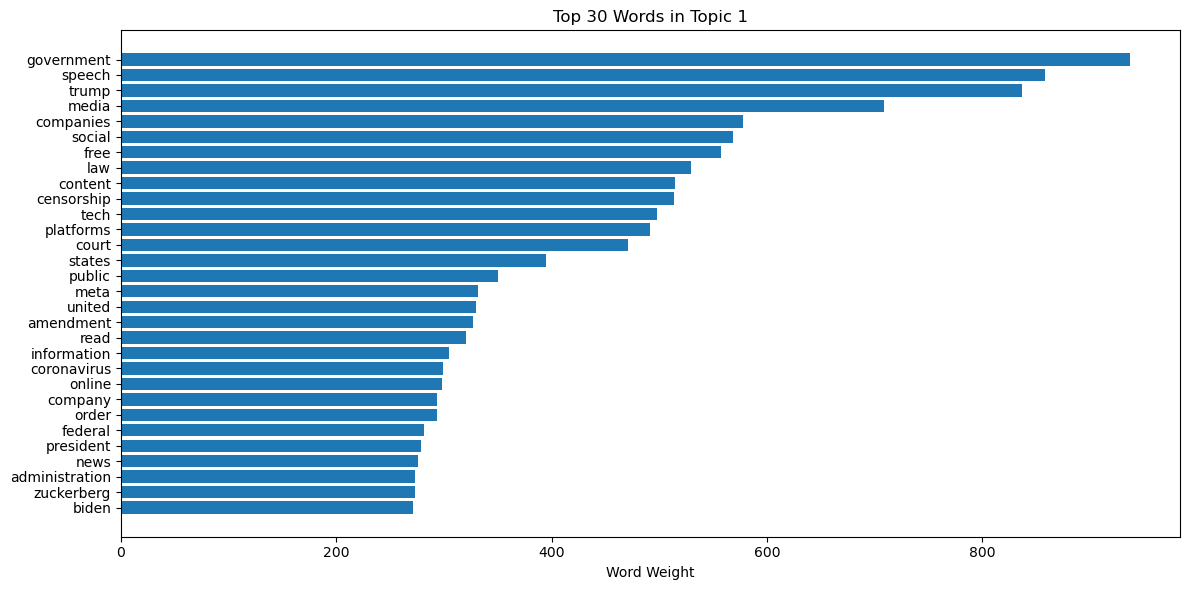

In [26]:
# Pick one topic (e.g., Topic 0)
topic_idx = 0
top_n = 30
topic = lda.components_[topic_idx]
top_words_idx = topic.argsort()[-top_n:][::-1]
top_words = [feature_names[i] for i in top_words_idx]
top_weights = topic[top_words_idx]

# Bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_words[::-1], top_weights[::-1])
plt.title(f"Top {top_n} Words in Topic {topic_idx + 1}")
plt.xlabel("Word Weight")
plt.tight_layout()
plt.show()